In [21]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np


import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
 

data = pd.read_csv('/Users/walkerrowe/Documents/mlbook/brakedata.csv', delimiter=',')



In [22]:
data['heat'].corr( data['worn'])

0.39400576858598574

In [23]:
 data

,worn,km,heat,z,pr
0,1,"20,000",240,2.720,0.938197
1,0,"5,000",98,-57.706,0.000000
2,1,"50,000",140,122.420,1.000000
3,0,"8,000",260,-45.220,0.000000
4,1,"23,790",225,17.835,1.000000
5,1,"24,644",245,21.311,1.000000
6,1,"29,934",195,42.321,1.000000
7,0,"14,045",153,-21.361,0.000000
8,0,"8,000",222,-45.334,0.000000
9,0,"9,855",149,-38.133,0.000000


In [24]:


labels=data['worn']
data.drop(columns=['worn'],axis=1,inplace=True)

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
km      12 non-null object
heat    12 non-null int64
z       12 non-null float64
pr      12 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 464.0+ bytes


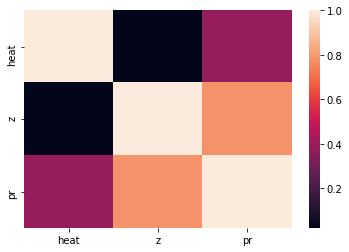

In [25]:
import seaborn as sns
import matplotlib as plt
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [26]:
 data.columns

Index(['km', 'heat', 'z', 'pr'], dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
km      12 non-null object
heat    12 non-null int64
z       12 non-null float64
pr      12 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 464.0+ bytes


In [28]:
data.shape

(12, 4)

In [29]:

data['km'] = data['km'].apply(lambda l : locale.atoi(l))

In [30]:


model = Sequential()

model.add(Dense(4, activation='relu', input_shape=(4,)))

model.add(Dense(2, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [31]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(data, labels,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
12/12 [==============================] - 0s 32ms/step - loss: 0.6940 - acc: 0.5000
Epoch 2/4
12/12 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.5833
Epoch 3/4
12/12 [==============================] - 0s 4ms/step - loss: 0.6924 - acc: 0.5833
Epoch 4/4
12/12 [==============================] - 0s 4ms/step - loss: 0.6918 - acc: 0.5833


In [32]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)


[array([[-0.47632116, -0.36588675, -0.41760108, -0.4963155 ],
       [-0.23593473,  0.6793334 , -0.35540748, -0.2500441 ],
       [-0.47274992, -0.6635369 , -0.3227501 , -0.492811  ],
       [-0.35299355, -0.847119  , -0.5518346 ,  0.07616901]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
[array([[-0.4225843 ,  0.40277982],
       [ 0.92263174,  0.46151733],
       [-0.9518969 , -0.36126184],
       [ 0.21547318,  0.7951331 ]], dtype=float32), array([0., 0.], dtype=float32)]
[array([[0.37457693],
       [0.1258893 ]], dtype=float32), array([0.03782909], dtype=float32)]


In [33]:
 
score = model.evaluate(data, labels,verbose=1)

print(score)

12/12 [==============================] - 0s 7ms/step
[0.6901736259460449, 0.5833333134651184]


In [34]:
model.predict_classes(np.array([23790,225,17.835,1.000000]).reshape(1,-1))

array([[1]], dtype=int32)

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
